In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 500)

In [2]:
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [3]:
# shape of the datset
df.shape

(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [7]:
# Missing Data & Null Values
mp=df.isnull().sum()

In [8]:
# null values columns having more than 30%
mp=mp[mp.values>(0.3*len(mp))]
len(mp)

64

In [9]:
# 64 columns having null values greater than 30% in the dataset which has to be removed

mp = list(mp[mp.values>=0.3].index)
df.drop(labels=mp,axis=1,inplace=True)
print(len(mp))

64


In [10]:
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

# Columns having less null percentage

In [11]:
df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [12]:
#AMT_ANNUITY column is having an outlier which is large, Median will be used for filling missing values

val=df['AMT_ANNUITY'].median()

df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=val

In [13]:
# All columns now have zero values and we can remove rows having greater null values 30 % or equal to

ne_row=df.isnull().sum(axis=1)
ne_row=list(ne_row[ne_row.values>=0.3*len(df)].index)

In [14]:
df.drop(labels=ne_row,axis=0,inplace=True)
print(len(ne_row))

0


In [15]:
# We have to remove columns which are not required from this dataset.

not_required=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [16]:
df.drop(labels=not_required,axis=1,inplace=True)

In [17]:
# We need to find columns having 'XNA' values which means not available.
# first for Gender Organization column

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [18]:
#  organization type column

df['ORGANIZATION_TYPE'].describe()


count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [19]:
# Drop the rows having 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [20]:
# Then Gender column

df[df['CODE_GENDER']=='XNA'].shape

(4, 28)

In [21]:
# Female gender has the majority of it , we can update the dataset with F for all XNA values

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

In [22]:
# Variables casted to number

n_m=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[n_m]=df[n_m].apply(pd.to_numeric)
df.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,WEDNESDAY,16,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,MONDAY,16,0,0,0,0,1,1,Other
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,THURSDAY,8,0,0,0,0,0,0,Electricity
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,SATURDAY,15,0,0,0,0,0,0,Medicine


## Binning 'AMT_INCOME_TOTAL' & 'AMT_CREDIT'

In [25]:
# Income amount

bg = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
space = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bg,labels=space)

In [26]:
# Credit amount

bg = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
space = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bg,labels=space)

In [27]:
# target=1(client with payment difficulties) and target=0(all other)

target_zero=df.loc[df["TARGET"]==0]
target_one=df.loc[df["TARGET"]==1]

##### Checking imbalance percentage

In [28]:
#target_zero is in majority & target_one is minority
round(len(target_zero)/len(target_one),2)

10.55

##### Univariate Analysis

In [31]:
# Client with NO payment difficulties

def plot_u(df,col,title,hue =None):
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 28
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title)
    plt.xticks(rotation=45)
    ax = sns.countplot(data = df, x= col, order= None,hue = hue) 
        
    plt.show()

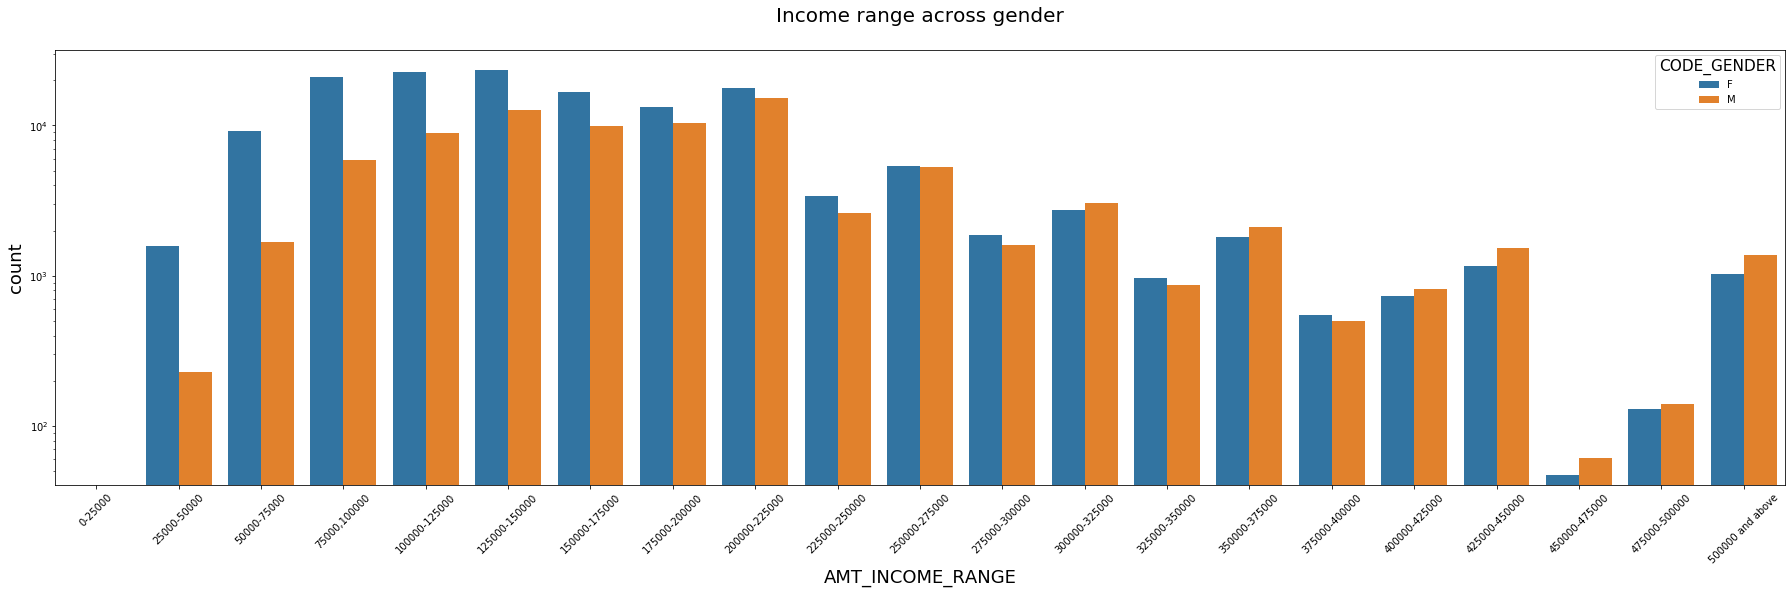

In [32]:
# income range

plot_u(target_zero,col='AMT_INCOME_RANGE',title='Income range across gender',hue='CODE_GENDER')


### Observation

#### Income range for different genders

1. We can observe that the Income range upto 2,50,000; Females tend to have a higher income than men
2. Females greater than male in having credits for that range.
3. Income range from 100000 to 200000 is having more of credits.

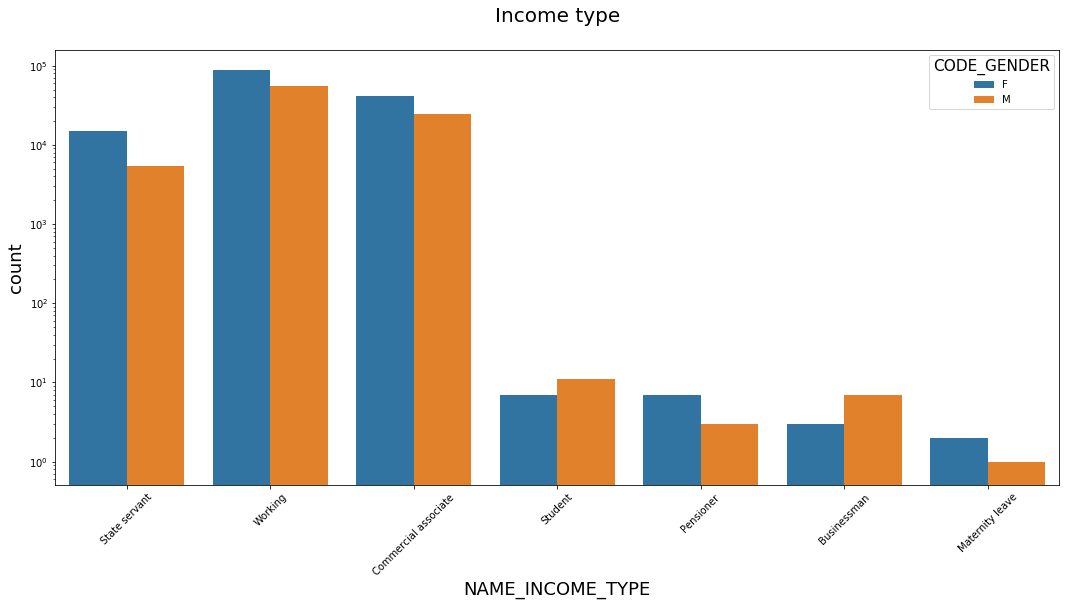

In [33]:
# Income Type

plot_u(target_zero,col='NAME_INCOME_TYPE',title='Income type',hue='CODE_GENDER')

### Observation

#### Income Type vs Gender

- We can see that people with income type "State servant", "Working" & "Commercial associate" tend to take more loans than students, pensioners, women on maternity leave and business men.
- Also in these categories, it is observed the Women are the major customers

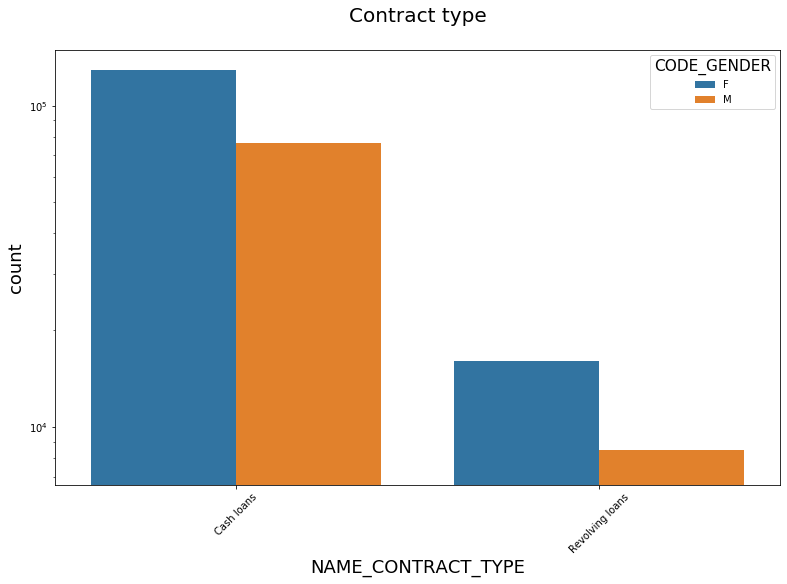

In [34]:
# Contract type
plot_u(target_zero,col='NAME_CONTRACT_TYPE',title='Contract type',hue='CODE_GENDER')

### Observation

#### Contract Type vs Gender

- We can see that there is tendency to take cash loans as compared to revolving loans. This trend could be due to higher interest rates of revolving loans when compared to cash loans.
- Again we observe, Female customers are the highest takers of Cash loans

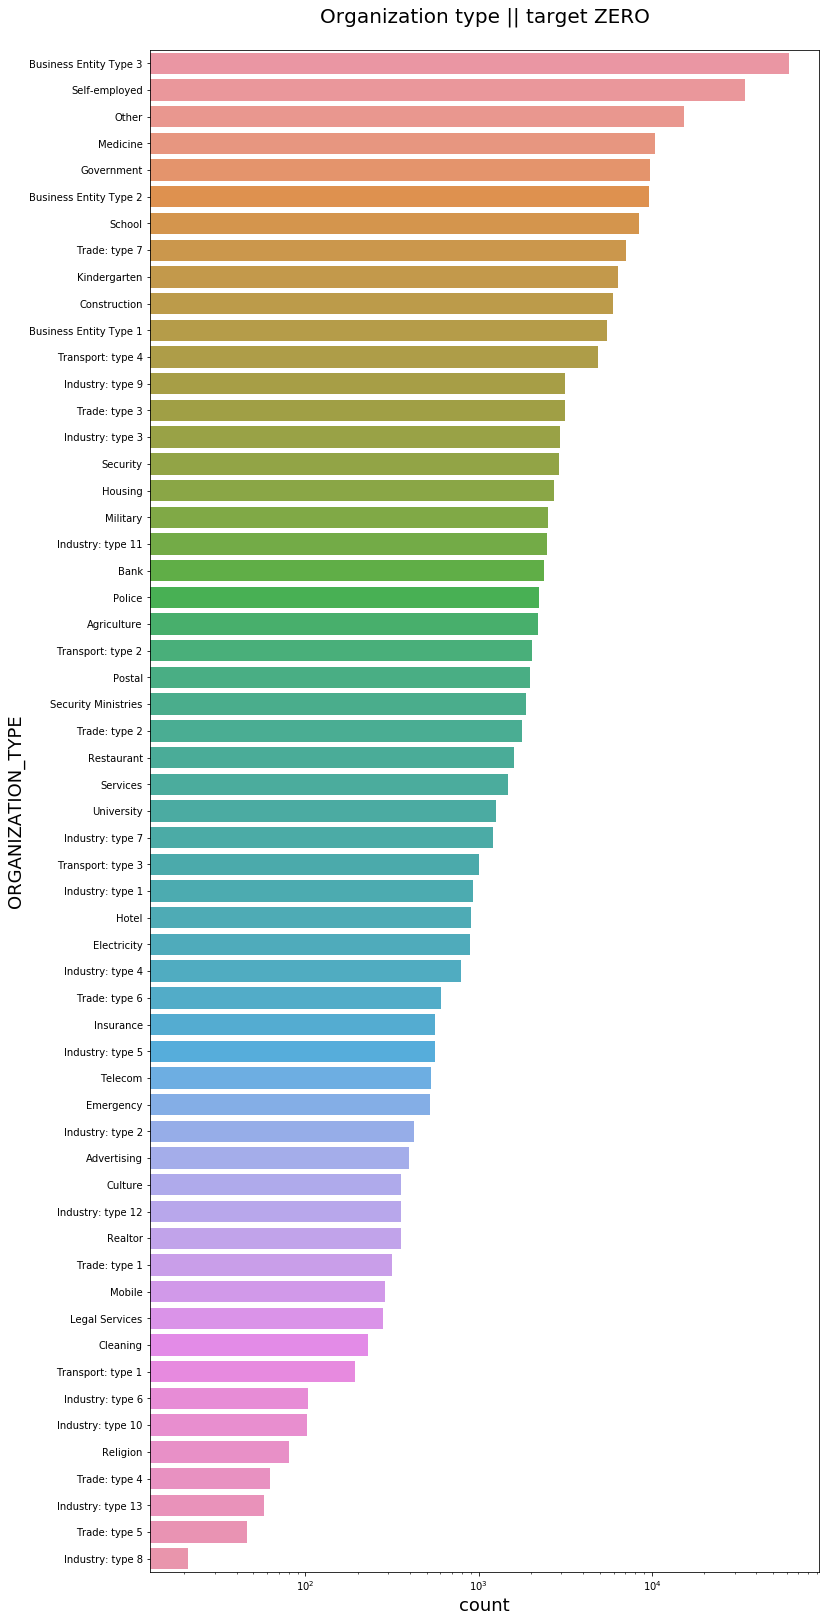

In [36]:
# Organization type

plt.figure(figsize=(12,28))
plt.rcParams['axes.titlepad'] = 28
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.xscale('log')
plt.title("Organization type || target ZERO")


sns.countplot(data=target_zero,y='ORGANIZATION_TYPE',order=target_zero['ORGANIZATION_TYPE'].value_counts().index)

plt.show()

### Observation

#### Organisation type based on non-default customers

- Industry type's, trade and religious institutions have a higher percentage of risk
- Business entity - type 3, Self employed, other and Medicine are the safest categories to loan money

In [37]:
# Correlation for columns for target zero and one 

target_zero_corr=target_zero.iloc[0:,2:]
target_one_corr=target_one.iloc[0:,2:]
targetzero=target_zero_corr.corr(method='spearman')
targetone=target_one_corr.corr(method='spearman')

In [38]:
targetzero

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [39]:
targetone

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [40]:
# heat map plotting for the above

def targ_c(data,title):
    plt.figure(figsize=(12, 8))
    plt.rcParams['axes.titlepad'] = 68
    plt.rcParams['axes.titlesize'] = 23


    sns.heatmap(data, cmap="YlOrBr",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()



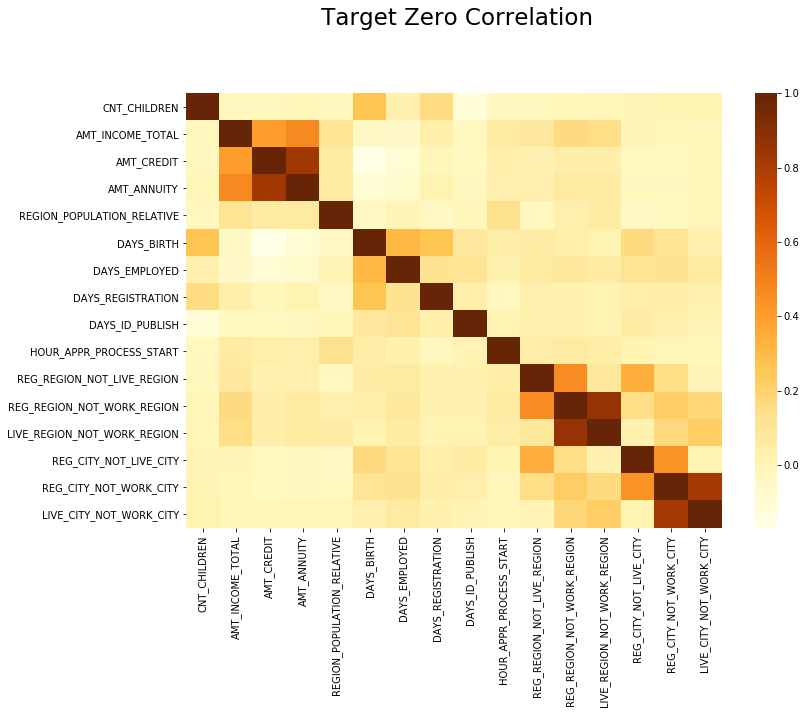

In [41]:
# Target Zero

targ_c(data=targetzero,title=' Target Zero Correlation')

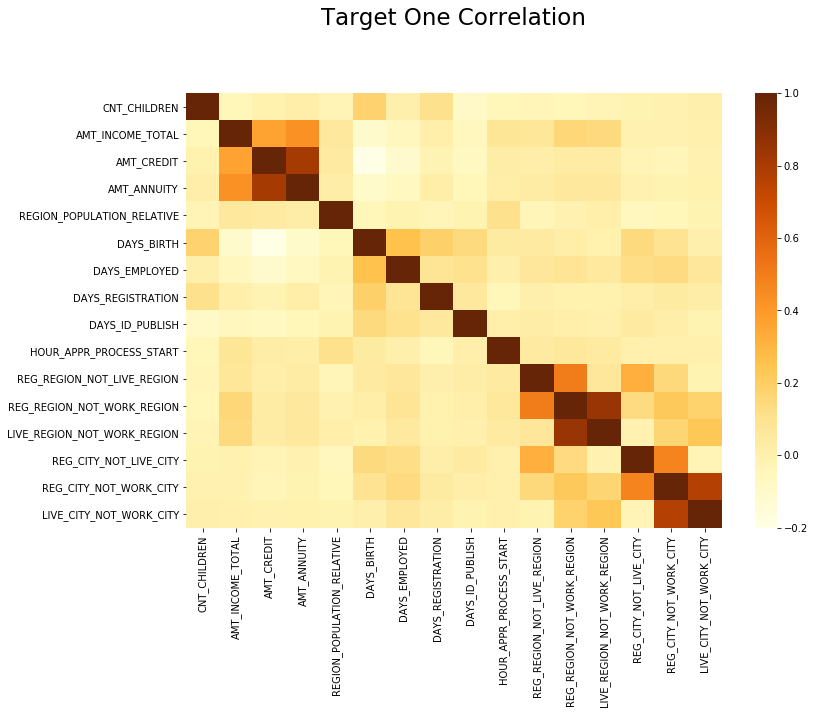

In [42]:
# For Target One

targ_c(data=targetone,title='Target One Correlation')

In [43]:
# Plotting for univariate variables analysis
def univar_aly(data,col,title):
    
    plt.rcParams['axes.titlepad'] = 28
    plt.rcParams["axes.labelsize"] = 18
    plt.rcParams['axes.titlesize'] = 20
    
    plt.yscale('log')
    plt.title(title)
    sns.boxplot(data =target_one, x=col,orient='v')
    plt.show()

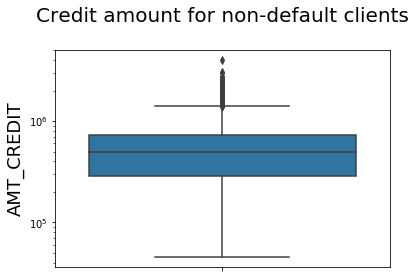

In [50]:
# credit amount target zero

univar_aly(data=target_zero,col='AMT_CREDIT',title='Credit amount for non-default clients')

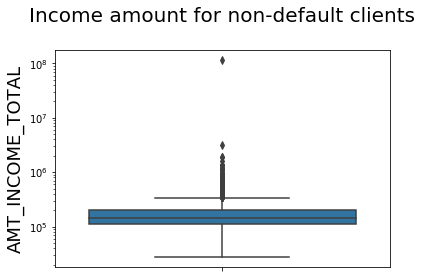

In [51]:
#income amount target zero
univar_aly(data=target_zero,col='AMT_INCOME_TOTAL',title='Income amount for non-default clients')

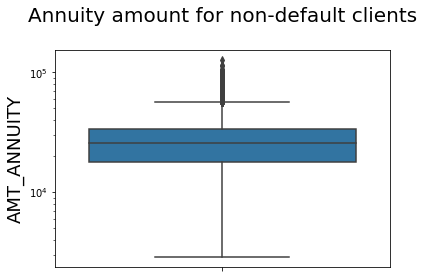

In [52]:
# Anuuity amount target zero

univar_aly(data=target_zero,col='AMT_ANNUITY',title='Annuity amount for non-default clients')

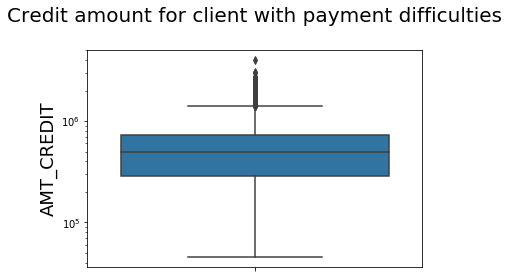

In [53]:
# credit amount target one

univar_aly(data=target_one,col='AMT_CREDIT',title='Credit amount for client with payment difficulties')

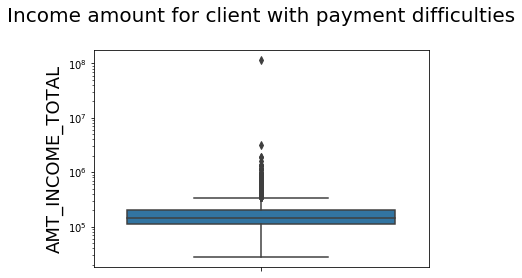

In [54]:
# income amount target one

univar_aly(data=target_one,col='AMT_INCOME_TOTAL',title='Income amount for client with payment difficulties')

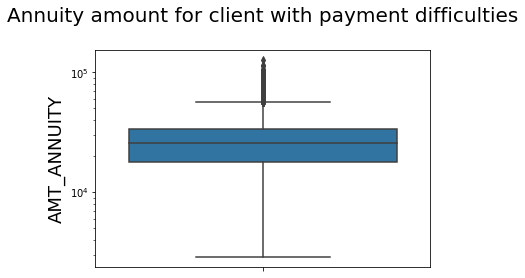

In [55]:
# Annuity amount target one

univar_aly(data=target_one,col='AMT_ANNUITY',title='Annuity amount for client with payment difficulties')

### Observation

#### Customer Income & Credit Amount

- We can observe that the Credit amount, Income and Annuity amount are similar for both target one & zero. 
- The Credit amount & Income of customer is independent of loan credit risk.

In [ ]:
# Plotting for B-ivariate Income amount  for target zero
plt.figure(figsize=(14,10))
plt.yscale('log')
sns.boxplot(data =target_zero, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Education Status vs Income amount for non-default clients')
plt.show()

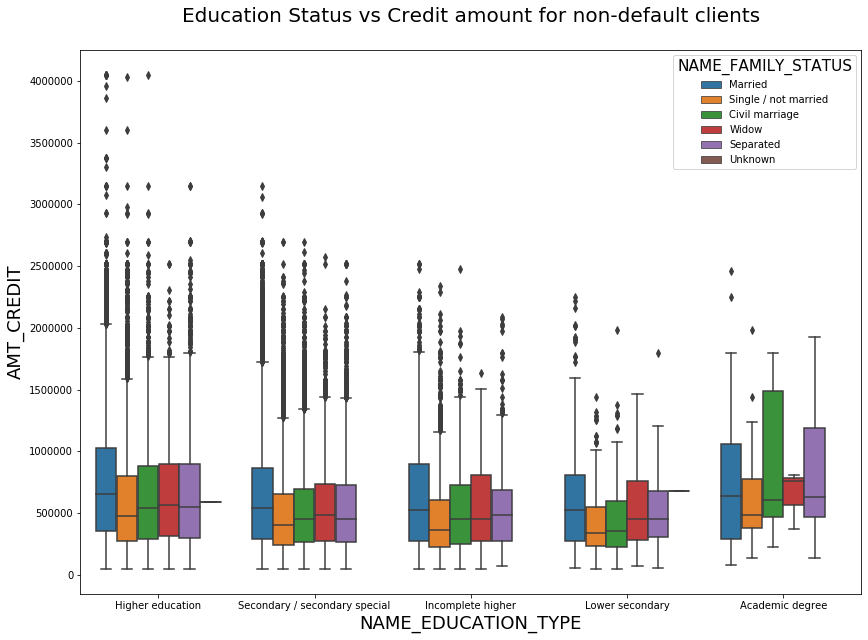

In [57]:
# Plotting for B-ivariate Credit amount  for target zero
plt.figure(figsize=(14,10))
sns.boxplot(data =target_zero, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Education Status vs Credit amount for non-default clients')
plt.show()

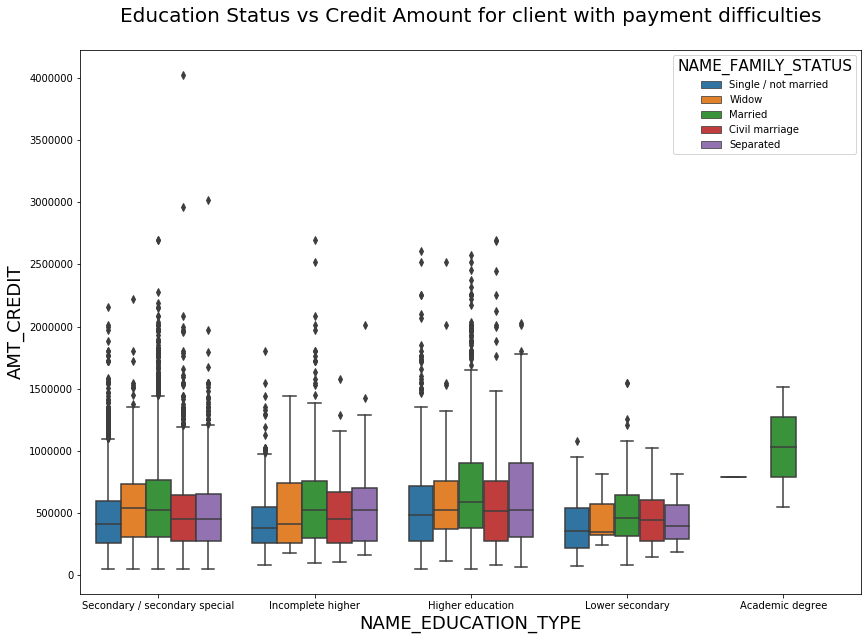

In [58]:
# Plotting for credit amount target one

plt.figure(figsize=(14,10))
sns.boxplot(data =target_one, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')
plt.title('Education Status vs Credit Amount for client with payment difficulties')
plt.show()

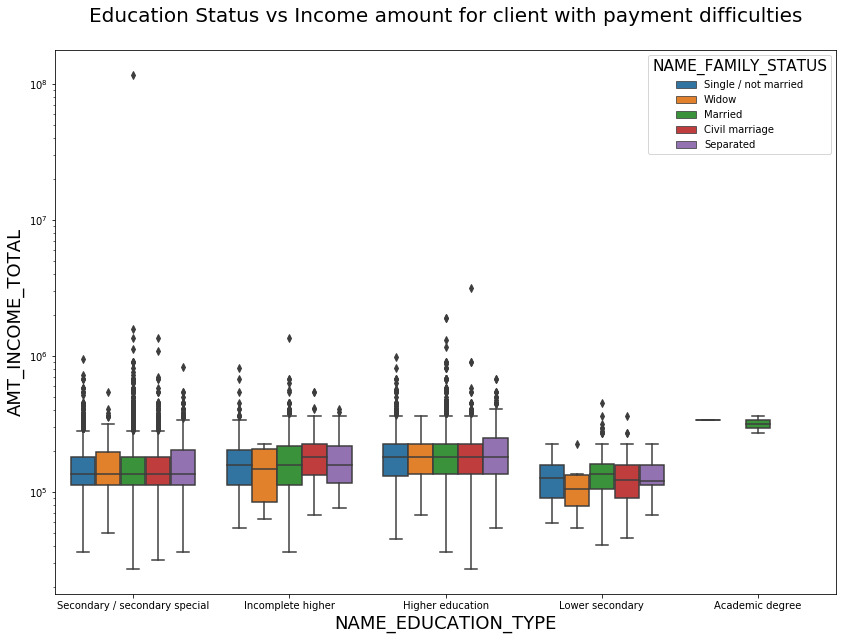

In [62]:
# Plotting for Income amount target one
plt.figure(figsize=(14,10))
plt.yscale('log')
sns.boxplot(data =target_one, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Education Status vs Income amount for client with payment difficulties')
plt.show()

### Observation

#### Education Status of customer and Income 

- The higher amount of clients who have payment difficulties are those who have incomplete higher education.
- We can infer from the below graph, the most likely defaulters are those with incomplete higher education, especially widows.

#### Education Status of customer and credit amount

- Customers with martial status Married and with an Academic degree are the largest defaulters as well as the largest pool of credit takers.
- Which means they are the largest target group to take a loan but as unlikely as to pay it back.

In [63]:
df1 = pd.read_csv("previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# shape of the datset
df1.shape

(1670214, 37)

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [66]:
# Missing Data & Null Values
mp1=df1.isnull().sum()

In [67]:
# null values columns having more than 30%
mp1=mp1[mp1.values>(0.3*len(mp1))]
len(mp1)

15

In [68]:
#removing col

mp1 = list(mp1[mp1.values>=0.3].index)
df1.drop(labels=mp1,axis=1,inplace=True)

df1.shape

(1670214, 22)

In [69]:
# Removing col values of 'XAP' & 'XNA'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

In [70]:
# Application dataset with previous appliaction dataset | Merging

fresh_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [71]:
# Renaming columns names

fresh_df1 = fresh_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [72]:
# Columns which are not required

fresh_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

# Univariate Analysis

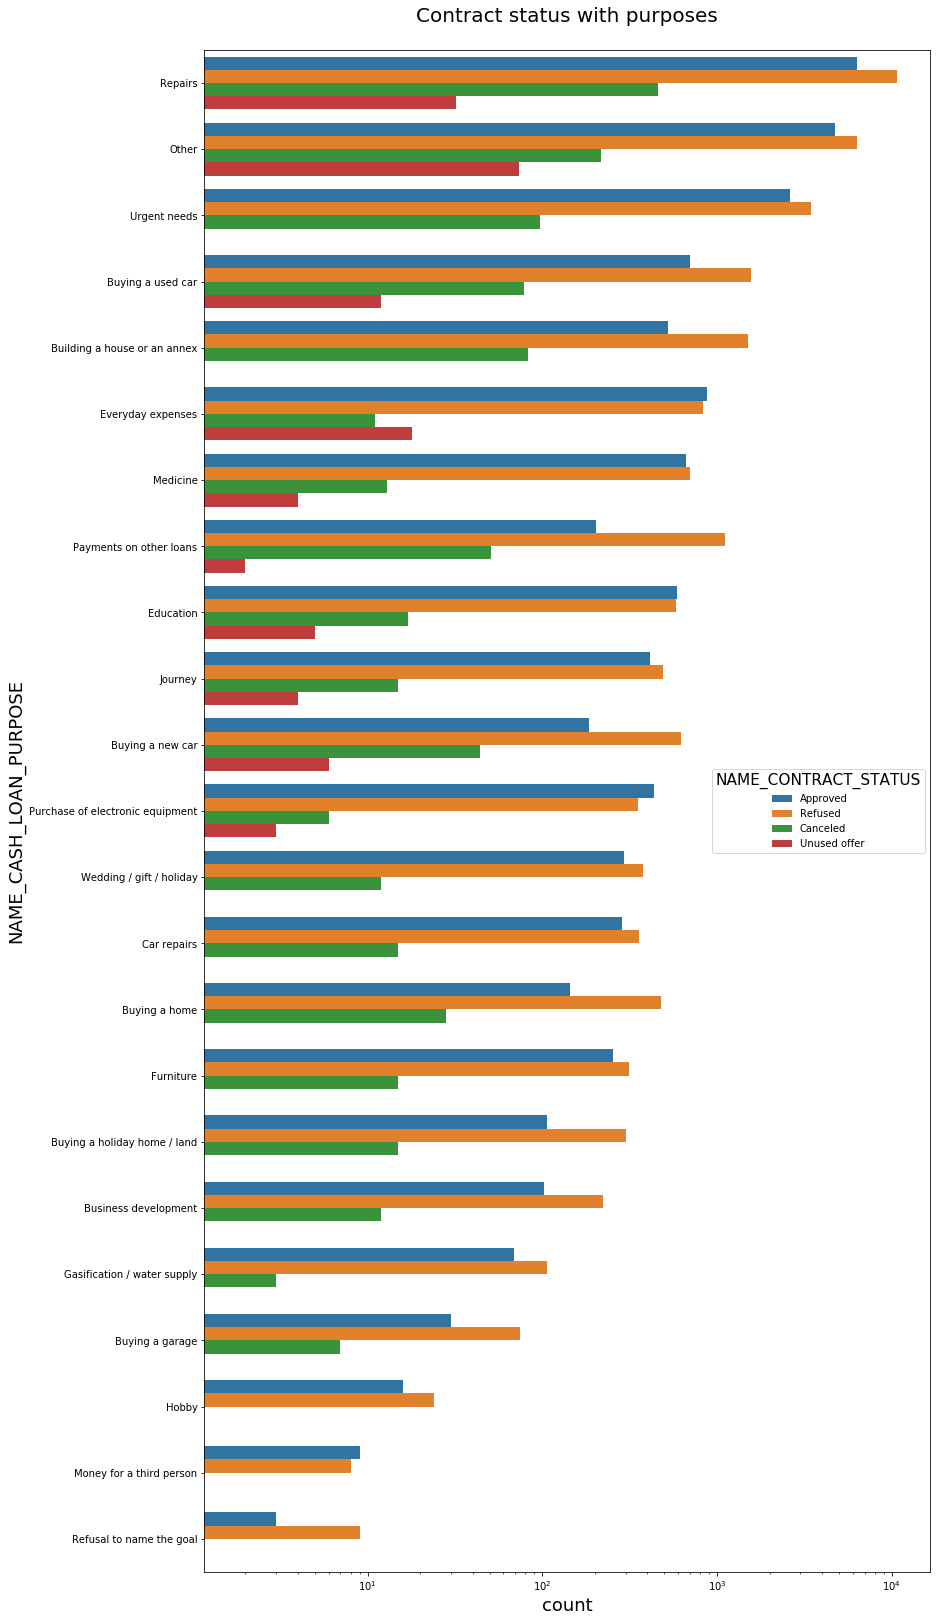

In [90]:
# logarithmic scale | contract status 

plt.figure(figsize=(13,28))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 28
plt.rcParams["axes.labelsize"] = 18
plt.xscale('log')
plt.title('Contract status with purposes')
ax = sns.countplot(data = fresh_df1, y= 'NAME_CASH_LOAN_PURPOSE',order=fresh_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

### Observation

#### Loan Purpose and Approval Status

- We observe that majority of the loans were taken for Repairs purpose.
- We also observe that, the rejection rate for “Payment of other loans” is higher compared to its approval rate.

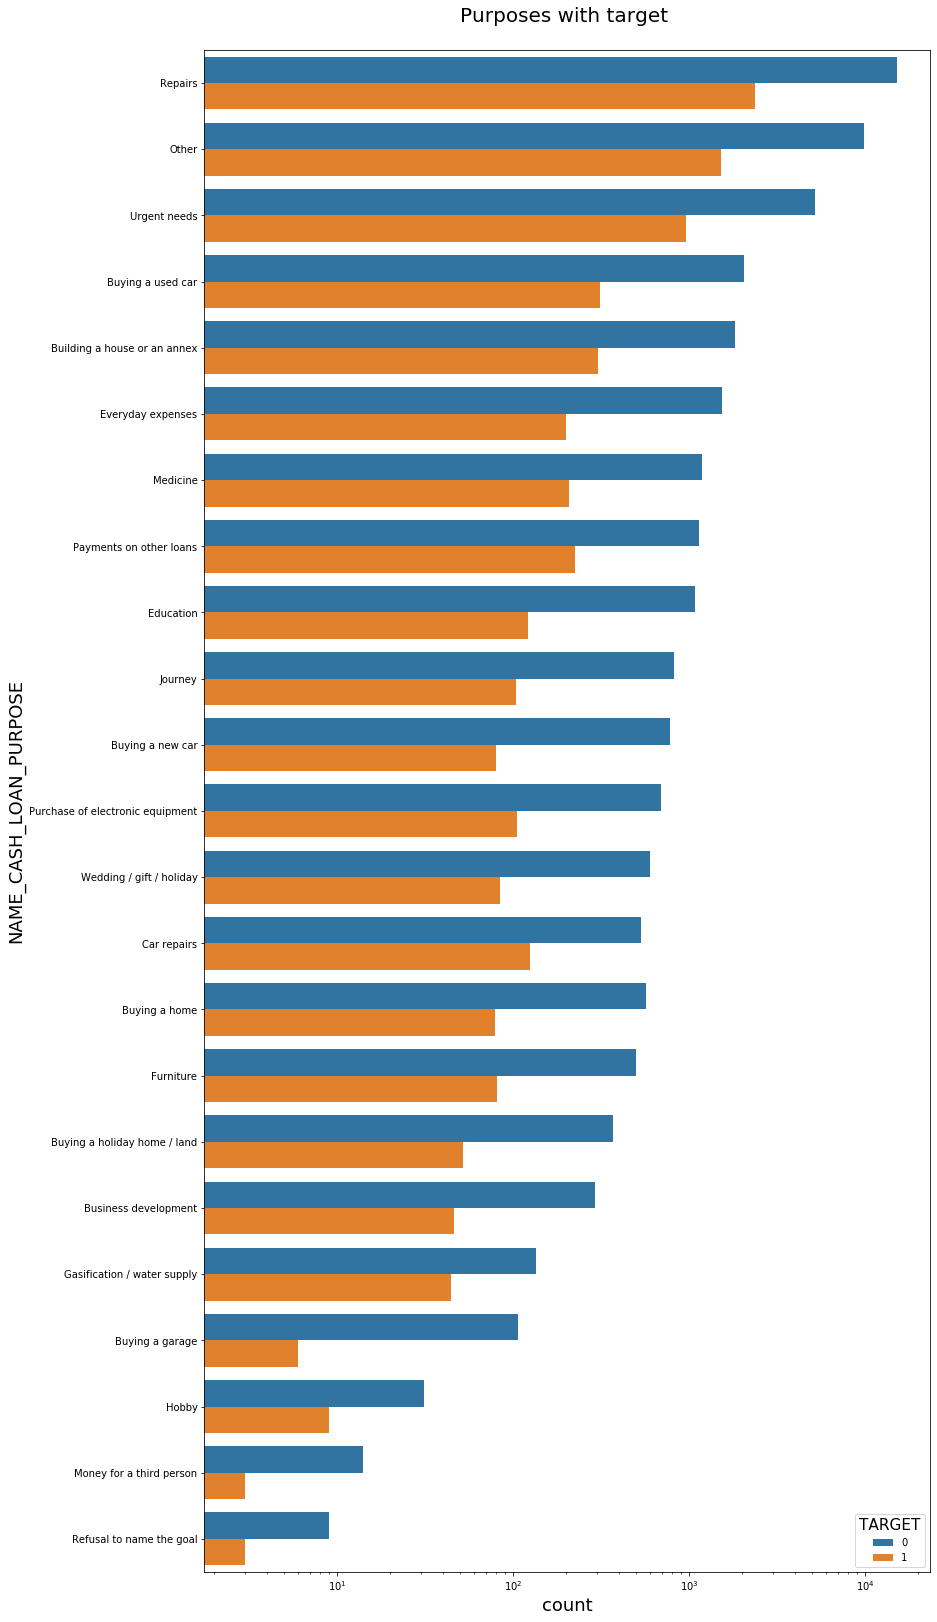

In [80]:
# Contract status

plt.figure(figsize=(13,28))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 28
plt.rcParams["axes.labelsize"] = 18
plt.xscale('log')
plt.title('Purposes with target ')
ax = sns.countplot(data = fresh_df1, y= 'NAME_CASH_LOAN_PURPOSE',order=fresh_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 

# Bi-variate Analysis

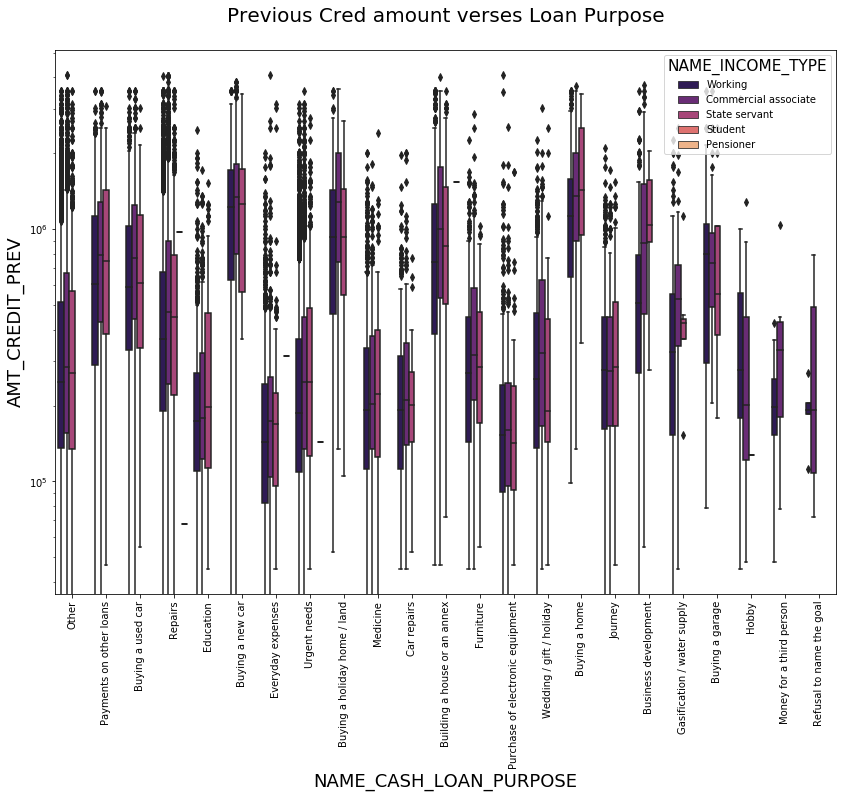

In [191]:
# Plotting Credit amount
plt.figure(figsize=(14,10))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =fresh_df1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',palette='magma')
plt.title('Previous Cred amount verses Loan Purpose')
plt.show()

### Observation

#### Previous credit of customer against loan purpose

- We observe that in previous credit, the highest amount of credit was taken for buying house by the State servant income type.
- The maximum credit amounts were taken for buying assets like home, car and land followed by payment for other loans and buying used cars. The uptake for buying a garage is also high.

- A recommendation would be to promote loan for car and garage together to increase the uptake of the latter.
- Also, the used car segment can be promoted widely to Students as the uptake is already high there.

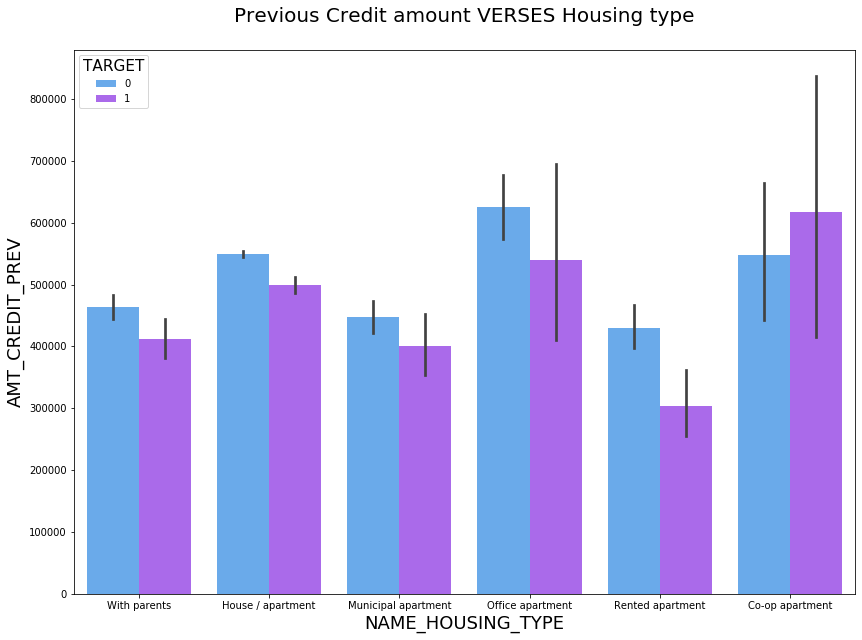

In [195]:
# Previous credit amount  vs Housing type

plt.figure(figsize=(14,10))
sns.barplot(data =fresh_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',palette='cool')
plt.title('Previous Credit amount VERSES Housing type')
plt.show()

Concluding with; 

- Getting client from housing type ‘With parents’ as less rate of unsuccessfull payments, saying that loan purpose 'repair has the highest number.

- Income type 'working' also has high unsuccessful payments. 